# Case Classificando bebidas

Será que é possível classificarmos o tipo de bebida dado alguns atributos como volume, quantidade de calorias e quantidade de cafeína?

Na aula de hoje vamos explorar o dataset caffeine para construirmos um classificador com base em modelos de árvores.

## Atributos
**bebida:** nome da bebida.

**Volume (ml):** Quantidade em volume.

**Calorias:** Quantidade de calorias.

**Cafeína(mg):** Quantidade de cafeína.

**tipo:** tipo de bebida. (Café, Bebidas Energéticas, Shots Energéticos, Refrigerantes, Chá, Água)

In [30]:
import pandas as pd                      
import matplotlib.pyplot as plt          
import seaborn as sb                    
import numpy as np                        

from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree  
from sklearn import tree

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz

In [2]:
dados = pd.read_csv("caffeine.csv", sep=",")

In [3]:
dados.shape

(610, 5)

In [4]:
dados.head()

,drink,Volume (ml),Calories,Caffeine (mg),type
0,Costa Coffee,256.993715,0,277,Coffee
1,Coffee Friend Brewed Coffee,250.191810,0,145,Coffee
2,Hell Energy Coffee,250.191810,150,100,Coffee
3,Killer Coffee (AU),250.191810,0,430,Coffee
4,Nescafe Gold,250.191810,0,66,Coffee


In [5]:
set(dados['type'])

{'Coffee', 'Energy Drinks', 'Energy Shots', 'Soft Drinks', 'Tea', 'Water'}

In [6]:
dados.isnull().sum() 

drink            0
Volume (ml)      0
Calories         0
Caffeine (mg)    0
type             0
dtype: int64

<Axes: xlabel='Volume (ml)', ylabel='Count'>

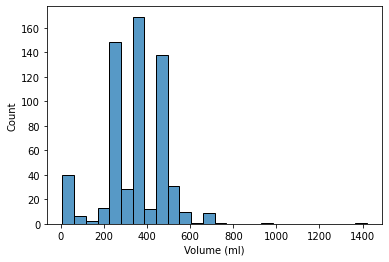

In [7]:
sb.histplot(data=dados, x="Volume (ml)")

<Axes: xlabel='Calories', ylabel='Count'>

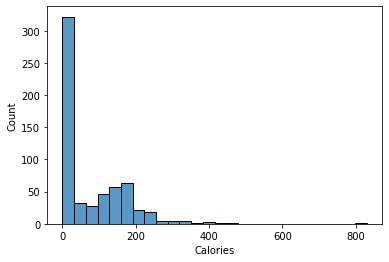

In [8]:
sb.histplot(data=dados, x="Calories")

<Axes: xlabel='Caffeine (mg)', ylabel='Count'>

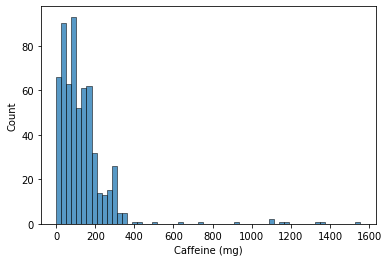

In [9]:
sb.histplot(data=dados, x="Caffeine (mg)")

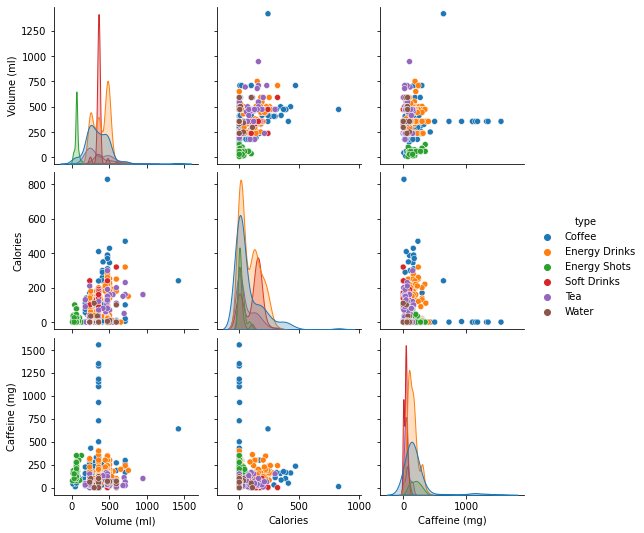

In [10]:
sb.pairplot(dados,vars=['Volume (ml)','Calories','Caffeine (mg)'],hue="type")

In [11]:
#Separando os dados
x = dados.drop(columns=['type', 'drink'])
y = dados['type'] 

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=7) 

In [13]:
dt = DecisionTreeClassifier(random_state=7, criterion='gini', max_depth = 3)

In [14]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=7)

In [15]:
y_predito = dt.predict(x_test) 

[Text(0.5, 0.875, 'x[2] <= 76.5\ngini = 0.752\nsamples = 488\nvalue = [138, 175, 29, 72, 53, 21]'),
 Text(0.25, 0.625, 'x[0] <= 312.888\ngini = 0.741\nsamples = 171\nvalue = [28, 16, 1, 67, 42, 17]'),
 Text(0.125, 0.375, 'x[0] <= 118.708\ngini = 0.653\nsamples = 60\nvalue = [24, 6, 1, 3, 25, 1]'),
 Text(0.0625, 0.125, 'gini = 0.219\nsamples = 8\nvalue = [7, 0, 1, 0, 0, 0]'),
 Text(0.1875, 0.125, 'gini = 0.645\nsamples = 52\nvalue = [17, 6, 0, 3, 25, 1]'),
 Text(0.375, 0.375, 'x[0] <= 367.451\ngini = 0.614\nsamples = 111\nvalue = [4, 10, 0, 64, 17, 16]'),
 Text(0.3125, 0.125, 'gini = 0.367\nsamples = 79\nvalue = [1, 4, 0, 62, 3, 9]'),
 Text(0.4375, 0.125, 'gini = 0.713\nsamples = 32\nvalue = [3, 6, 0, 2, 14, 7]'),
 Text(0.75, 0.625, 'x[0] <= 138.404\ngini = 0.619\nsamples = 317\nvalue = [110, 159, 28, 5, 11, 4]'),
 Text(0.625, 0.375, 'x[2] <= 131.5\ngini = 0.124\nsamples = 30\nvalue = [2, 0, 28, 0, 0, 0]'),
 Text(0.5625, 0.125, 'gini = 0.346\nsamples = 9\nvalue = [2, 0, 7, 0, 0, 0]'),
 

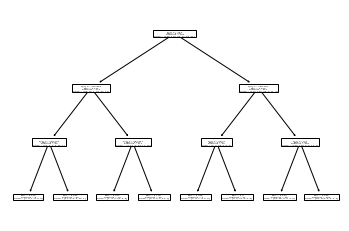

In [16]:
tree.plot_tree(dt)

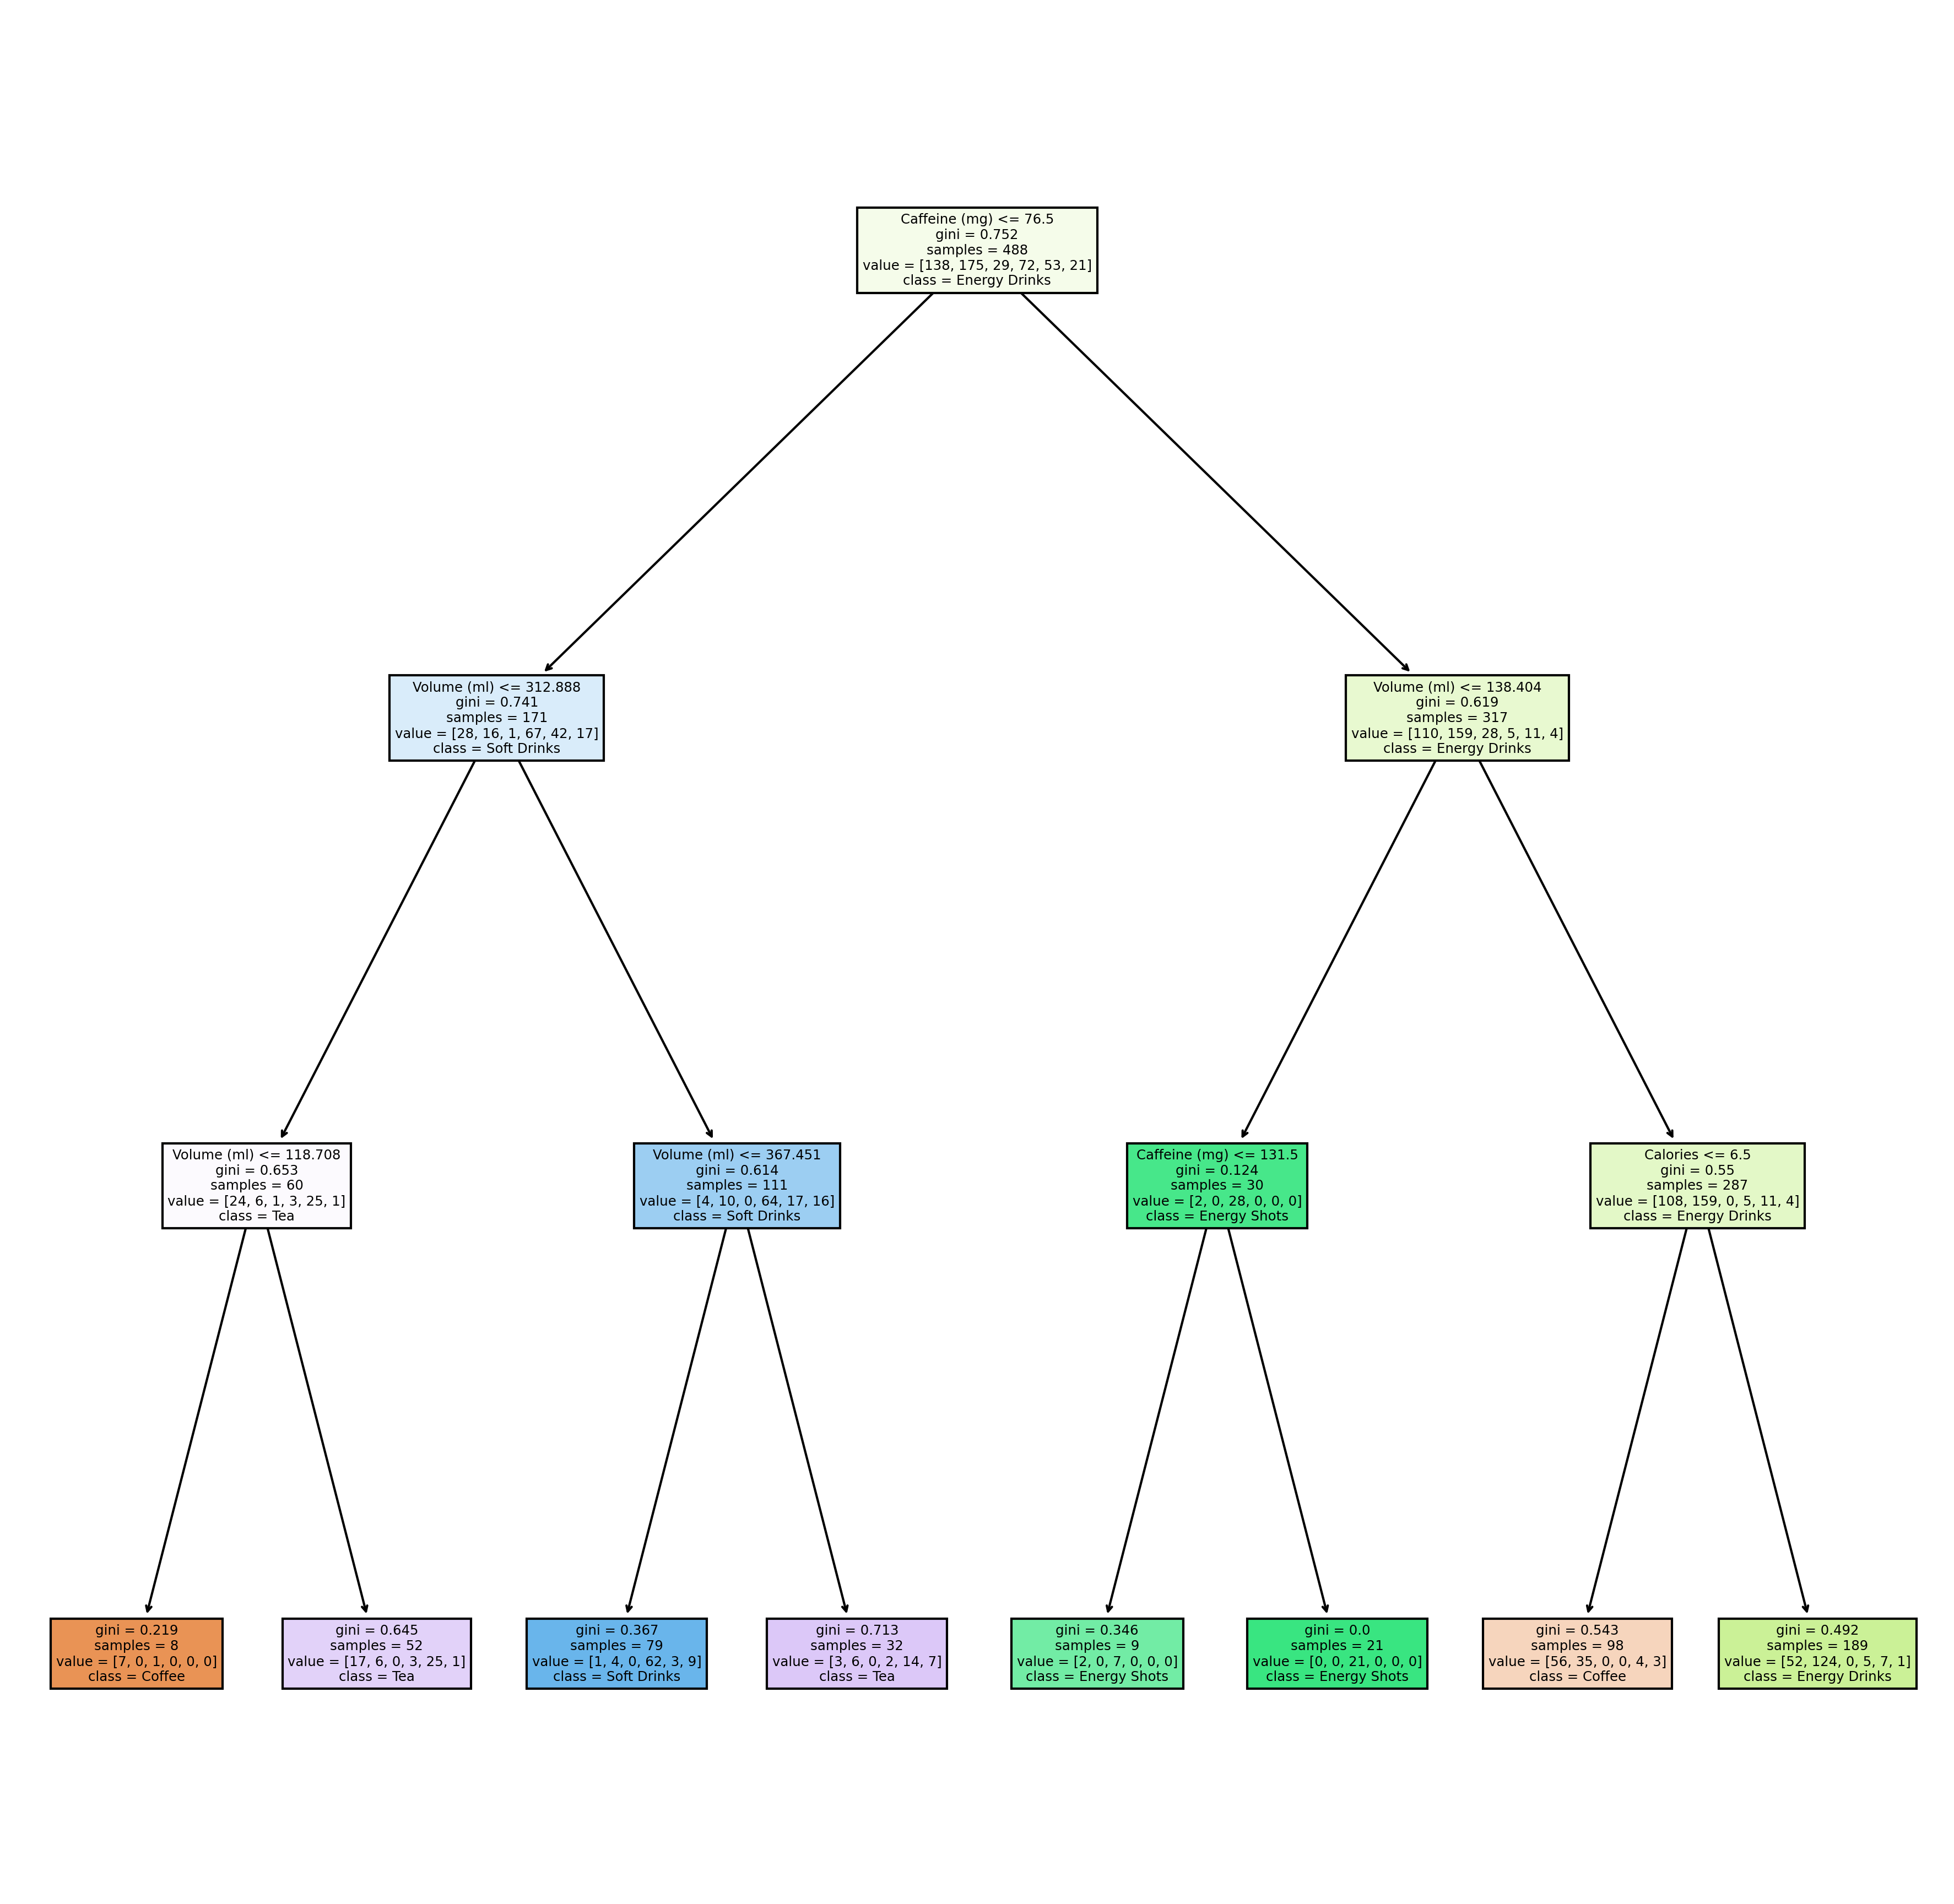

In [17]:
class_names = ['Coffee', 'Energy Drinks', 'Energy Shots', 'Soft Drinks', 'Tea', 'Water']
label_names = ['Volume (ml)',	'Calories',	'Caffeine (mg)'	]

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,15), dpi=300)

tree.plot_tree(dt,
               feature_names = label_names, 
               class_names=class_names,
               filled = True)

fig.savefig('imagename.png')

In [31]:
print(accuracy_score(y_test, y_predito)) #relatório de validação das métrica de desempenho.

0.6557377049180327


In [19]:
dados['type'].value_counts()

Energy Drinks    219
Coffee           173
Soft Drinks       90
Tea               66
Energy Shots      36
Water             26
Name: type, dtype: int64

Se as variáveis target do seu modelo de decision tree não estão equilibradas, isso pode afetar a precisão e a acurácia do seu modelo, especialmente se a classe minoritária é importante para o seu problema.

Utilize algoritmos que são robustos a desequilíbrios de classe: Alguns algoritmos de machine learning são projetados para serem robustos a desequilíbrios de classe. Alguns exemplos incluem o **Random Forests**.

Existem algumas técnicas que podem ser usadas para equilibrar classes com um modelo de Random Forest. Duas abordagens comuns são o ajuste do parâmetro **class_weight** e a aplicação de técnicas de reamostragem.

O parâmetro class_weight permite atribuir pesos diferentes às classes no modelo de Random Forest. Ele pode ser ajustado para dar mais peso às classes minoritárias, ajudando a equilibrar o modelo. Você pode definir o valor do parâmetro "class_weight" como **"balanced"**, o que fará com que o modelo ajuste automaticamente os pesos de acordo com a frequência de cada classe.

Técnicas de reamostragem:
Outra abordagem comum é usar técnicas de reamostragem, como oversampling e undersampling, para equilibrar as classes. Oversampling envolve a duplicação ou triplicação de observações da classe minoritária, enquanto undersampling envolve a redução do número de observações da classe majoritária. Isso ajuda a garantir que o modelo seja treinado com um número igual de observações para cada classe.

Você pode experimentar essas técnicas individualmente ou combiná-las para obter melhores resultados em termos de equilíbrio de classes em seu modelo de Random Forest. É importante lembrar que o ajuste correto de hiperparâmetros é fundamental para obter bons resultados em qualquer modelo de machine learning.

In [20]:
from imblearn.over_sampling import SMOTE

In [21]:
# Aplicar SMOTE para oversampling da classe minoritária
oversample = SMOTE()
x_train_os, y_train_os = oversample.fit_resample(x_train, y_train)

Nesse exemplo, SMOTE é utilizado para gerar dados sintéticos e equilibrar as classes antes de ajustar o modelo de Random Forest. Note que o método fit_resample é utilizado para aplicar o oversampling na classe minoritária. Por fim, o modelo é avaliado com a métrica de acurácia no conjunto de teste.

Oversampling envolve a criação de mais exemplos para a classe minoritária, aumentando sua representação no conjunto de dados. As técnicas comuns de oversampling incluem a replicação de exemplos existentes (cópia de exemplos da classe minoritária), a geração sintética de novos exemplos com base em exemplos existentes, como a técnica SMOTE (Synthetic Minority Over-sampling Technique), ou a combinação de ambas as abordagens.

In [22]:
x_train.shape

(488, 3)

In [23]:
x_train_os.shape

(1050, 3)

In [63]:
rf = RandomForestClassifier(criterion= 'entropy', n_estimators=80, max_depth = 7, class_weight = 'balanced', random_state=7) 

rf.fit(x_train_os, y_train_os) 



RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=7, n_estimators=80, random_state=7)

In [64]:
estimator_rf = rf.estimators_

In [65]:
y_predito_random_forest = rf.predict(x_test) 

In [66]:
print(accuracy_score(y_test, y_predito_random_forest)) #relatório de validação das métrica de desempenho.

0.7295081967213115


In [67]:
print (rf.score(x_train, y_train)) 
print(rf.score(x_test, y_test))

0.860655737704918
0.7295081967213115
